Importing the dependencies

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

Loading the Dataset

In [3]:
path="/content/Titanic-Dataset.csv"
data = pd.read_csv(path)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.shape

(891, 12)

In [7]:

data.size

10692

In [8]:
#Cheking the Statistical informstion of the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Droping the irrelevant columns to make the prediction more accurate :-
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data.drop(['Fare'] , axis=1 , inplace=True)

In [11]:
#Handling the missing values in the dataset

imputer = SimpleImputer(strategy='mean')
data[['Age']] = imputer.fit_transform(data[['Age']])

In [12]:

data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


Labeling the feature

In [13]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

Spliting the feature and target variables

In [14]:
X = data.drop(columns=['Survived'])
y = data['Survived']

Spliting the dataset into training and testing data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modelling

In [16]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.000000,1,0,2
1,1,1,0,38.000000,1,0,0
2,1,3,0,26.000000,0,0,2
3,1,1,0,35.000000,1,0,2
4,0,3,1,35.000000,0,0,2
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2
887,1,1,0,19.000000,0,0,2
888,0,3,0,29.699118,1,2,2
889,1,1,1,26.000000,0,0,0


In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Making the predictions

In [24]:
y_pred = model.predict(X_test)

In [25]:
#Cheking the model --:


new_data = pd.DataFrame({
    'Pclass': [3 , 3],
    'Sex': [1 , 0],  # 0 for female, 1 for male
    'Age': [34.5000 , 47.0000],
    'SibSp': [0  ,1],
    'Parch': [0 , 0],
    'Embarked':[1 , 2]  # 0 for 'C', 2 for 'S'
})


predictions = model.predict(new_data)

for i, prediction in enumerate(predictions):
    print(f"Passenger {i+1} prediction: {'Survived' if prediction == 1 else 'Not Survived'}")

Passenger 1 prediction: Not Survived
Passenger 2 prediction: Not Survived


In [26]:
# Make predictions using the trained model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8156424581005587


In [33]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<ipython-input-30-d41487449e59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette=custom_colors)


<Axes: xlabel='Survived', ylabel='count'>

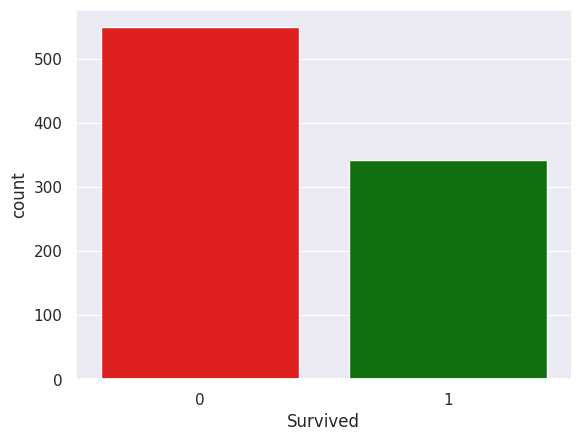

In [30]:
sns.set()
custom_colors = ["red", "green"]
sns.countplot(x='Survived', data=data, palette=custom_colors)

In [31]:
data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

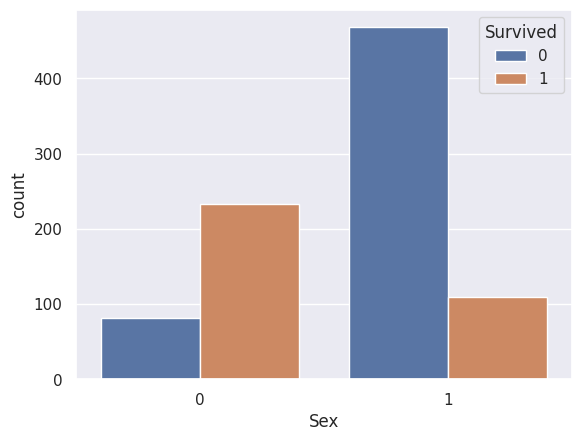

In [35]:
# no of survivers based on gender wise
sns.countplot(x='Sex', hue='Survived', data=data)